**AMATH 741 Final Project**

Notebook adapted from https://github.com/biomathlab/PDElearning

New data for project stored in https://github.com/Melissa-Stadt/AM741-PDElearning

Clone git repository and move to correct directory

In [ ]:
!git clone https://github.com/Melissa-Stadt/AM741-PDElearning.git

Cloning into 'AM741-PDElearning'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (446/446), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 446 (delta 219), reused 393 (delta 177), pack-reused 0
Receiving objects: 100% (446/446), 52.38 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (219/219), done.


In [ ]:
%cd AM741-PDElearning/PDEFIND/

/content/AM741-PDElearning/PDEFIND


In [ ]:
!pip install statistics

  Created wheel for statistics: filename=statistics-1.0.3.5-cp27-none-any.whl size=7454 sha256=60f65fb3354311c50484fc3255f205e9164bbc5e699ed205782af42539dad720
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


In [ ]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from PDE_FIND2 import *
from matplotlib.patches import Polygon
import os
import itertools
import statistics
import seaborn as sns
import pandas as pd

**Melissa note:** I made some changes to what the filenames were set as since it seemed that my implementation of PDEFIND saved files under a different filename. I commented out a few lines which are listed below (Melissa is noted before them) which changed the filenames which allowed this python notebook to work.
It seemed the figures turned out fine with this change but let me know if there are things that seem different or if you see why they had the original filenames there.

pickle_data/Greedy_00_finite_differences_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_00_splines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_00_NCV_bisplines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_00_global_NCV_bisplines_3_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_00_nn_bins_fisher_nonlin_prune_deg_2.npz


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


pickle_data/Greedy_01_finite_differences_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_01_splines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_01_NCV_bisplines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_01_global_NCV_bisplines_3_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_01_nn_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_05_finite_differences_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_05_splines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_05_NCV_bisplines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_05_global_NCV_bisplines_3_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_05_nn_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_10_finite_differences_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_10_splines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_10_NCV_bisplines_bins_fisher_nonlin_prune_deg_2.npz
pickle_data/Greedy_10_global_NCV_bisplines_3_bins_fisher_nonlin_prune_deg_2.npz
pick

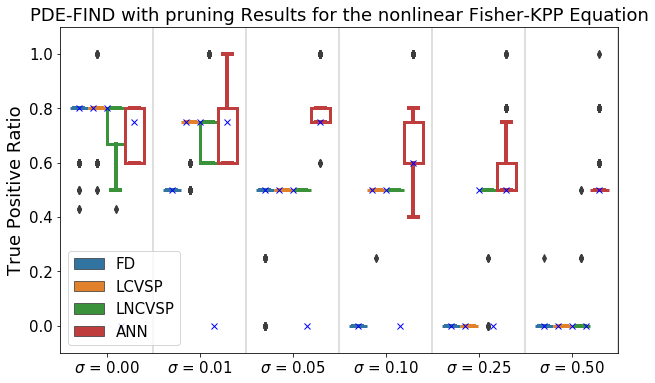

In [ ]:
#where data was written
write_dir = 'pickle_data/'

#math model
#options are 'diffadv','fisher','fisher_nonlin'
#model_str_list = ['diffadv','fisher','fisher_nonlin']
model_str_list = ['fisher_nonlin']

#noise levels that were considered
data_files_1 = ['00_','01_','05_','10_','25_','50_']

#other specs of implementation
algoName = 'Greedy'
shufMethod = 'bins'
deg = 2

#methods used for computation, as well as their abbreviations
methods = ['finite_differences','splines','NCV_bisplines',
           'global_NCV_bisplines_3','nn']
method_strings = ['FD','LCVSP','LNCVSP','GNCVSP','ANN']

for model_str in model_str_list:
    #load in true equation form
    if model_str == 'diffadv':
        deriv_list = ['u_{xx}','u_{x}']
    elif model_str == 'fisher':
        deriv_list = ['u_{xx}','u','u^2']
    elif model_str == 'fisher_nonlin':
        deriv_list = ['uu_{xx}','u_{x}^2','u','u^2']

    #initialize lists of the median TPR score
    median_TPR = []
    #vote for the equation form
    xi_vote = []
    #vote for each param individually
    xi_vote_params = []

    Make_df = True
    for d in data_files_1:   
        for j,m in enumerate(methods):

            #load in data
            # Melissa change (comment three lines because filenames seemed off)
            #if 'NCV_bisplines' not in m:
                #filename = write_dir + algoName + '_' +d+m+ '_' + shufMethod + '_'+model_str+'_prune_tv_5050_1_21_deg_' +str(deg)+ '.npz'
            #else:
            filename = write_dir + algoName + '_' +d+m+ '_' + shufMethod + '_'+model_str+'_prune_deg_' +str(deg)+ '.npz'
            print filename
            if os.path.isfile(filename):

                #load in data
                data = np.load(filename)
                #compute median TPR without pruning
                median_TPR_no_prune = []
                #make list of TPR data without pruning
                for i in np.arange(len(data['xi_list_no_prune'].tolist())):    
                    median_TPR_no_prune.append(TP_TPFPFN(data['xi_list_no_prune'].tolist()[i],data['description'].tolist(),deriv_list))


                #create data frame of TPR, method, and noise level
                d_dict = {'TP':data['TP_score_list'].tolist(),'TPR_no_prune':median_TPR_no_prune
                          ,'method':method_strings[j],'sigma':d[:2]}
                df_new = pd.DataFrame(d_dict)
                #create initial data frame if not yet existing, otherwise just append
                if Make_df:
                    df = df_new
                    Make_df = False
                else:
                    df = df.append(df_new)

                #calculate median TPR (after pruning) from data frame
                median_TPR.append(statistics.median(data['TP_score_list'].tolist()))


                # now determine the most-common equation
                xi_vote_tmp = []
                for i in range(len(data['xi_list'])):
                    #convert nonzero entries of xi to a decimal number, signifying which equation
                    #form we are voting for
                    xi_vote_tmp.append(trans_rev((data['xi_list'][i] != 0)*1))
                #append the most common equation form
                xi_vote.append(most_common(xi_vote_tmp))

                matrix_vote_initialized = False
                #now generate parameter estimates from the most common equation form
                #by looping back through each xi value. If it matches the most commonly
                #chosen xi form, then we add its parameter estimates to the final list
                #
                # each column of A corresponds to one such xi estimate
                # each row of A corresponds to different terms in A
                for i in range(len(data['xi_list'])):
                    xi_full = data['xi_list'][i]
                    #if current xi matches most common xi
                    if xi_vote[-1]==trans_rev(xi_full != 0)*1:
                        if not matrix_vote_initialized:
                            A = xi_full
                            matrix_vote_initialized = True
                        else:
                            A = np.hstack((A,xi_full))
                #take mean along columns of A to get param estimates
                xi_vote_params.append(np.mean(A,axis=1))

            #if file does not exist, just make everything empty
            else:
                d_dict = {'TP':[],'method':m,'sigma':d[:2]}
                df_new = pd.DataFrame(d_dict)
                df.append(df_new)

                xi_vote.append([])
                xi_vote_params.append([])
                median_TPR.append(0)

        
    #make box and whisker plot for PDE-FIND with pruning

    #fontsize
    font = {'size': 15}
    mpl.rc('font', **font)

    #initialize figure
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.boxplot(
        x='sigma',
        y='TP',
        hue='method',
        data=df)


    plt.legend(loc='lower left')

    #trick to plot the median scores on top of box plots (depends on length of method)
    if len(methods) == 3:
        plot_diff = 0.27
        for i in np.arange(len(data_files_1)):
            if i == 0:
                median_xvec = np.array([-plot_diff,0,plot_diff])
            else:
                median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i,i+plot_diff])])
            plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
        plt.plot(median_xvec,median_TPR,'bx')
    elif len(methods)==2:
        plot_diff = 0.2
        for i in np.arange(len(data_files_1)):
            if i == 0:
                median_xvec = np.array([-plot_diff,plot_diff])
            else:
                median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i+plot_diff])])
            plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
        plt.plot(median_xvec,median_TPR,'bx')
    elif len(methods)==4:
        plot_diff = 0.28
        for i in np.arange(len(data_files_1)):
            if i == 0:
                median_xvec = np.array([-plot_diff,-plot_diff/2.0,plot_diff/2.0,plot_diff])
            else:
                median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i-plot_diff/2.0,i+plot_diff/2.0,i+plot_diff])])
            plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
        plt.plot(median_xvec,median_TPR,'bx')
    elif len(methods)==5:
        plot_diff = 0.3
        for i in np.arange(len(data_files_1)):
            if i == 0:
                median_xvec = np.array([-plot_diff,-plot_diff/2.0,0,plot_diff/2.0,plot_diff])
            else:
                median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i-plot_diff/2.0,i,i+plot_diff/2.0,i+plot_diff])])
            plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
        plt.plot(median_xvec,median_TPR,'bx')


    #loop through box plots and change line formatting and color
    for j in range(len(ax.artists)):

        #access box
        box = ax.artists[j]
        #box color
        col = box.get_facecolor()
        #set edge of box to be this color
        box.set_edgecolor(col)
        #set to white inside
        box.set_facecolor('white')
        #increase thickness
        box.set_linewidth(3)

        #update 6 lines of the box plot
        for k in np.arange(6):
            line = ax.lines[6*j+k]
            line.set_color(col)
            if k == 4:
                #get rid of median line
                line.set_linewidth(0)
            else:
                #increase thickness
                line.set_linewidth(4)

    #title
    if model_str == 'diffadv':
        title_str = "PDE-FIND with pruning Results for the Diffusion-Advection Equation"
    elif model_str == 'fisher':
        title_str = "PDE-FIND with pruning Results for the Fisher-KPP Equation"
    elif model_str == 'fisher_nonlin':
        title_str = "PDE-FIND with pruning Results for the nonlinear Fisher-KPP Equation"

    ax.set_title(title_str,fontsize=18)
    ax.set_ylabel("True Positive Ratio",fontsize=18)
    ax.set_xlabel("")
    plt.ylim((-1e-1,1+1e-1))

    ax.set_xticklabels(["$\sigma$ = 0.00","$\sigma$ = 0.01","$\sigma$ = 0.05",
                        "$\sigma$ = 0.10","$\sigma$ = 0.25","$\sigma$ = 0.50"])

    plt.savefig(algoName + '_'+model_str+'_prop_' + shufMethod + '_pruning.eps', format='eps', dpi=1000)

**Melissa question:** I think this next cell just adjusts the figure I think???

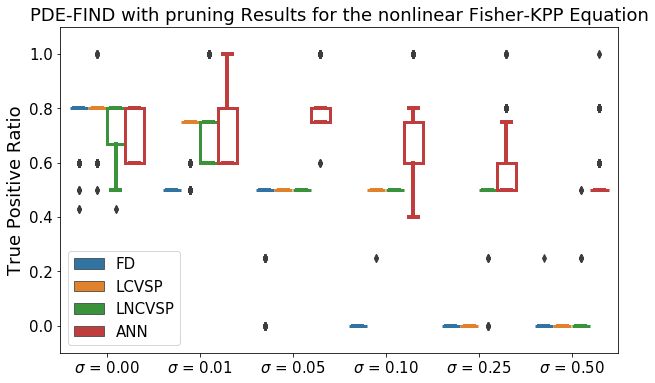

In [ ]:
#make box and whisker plot for PDE-FIND with pruning

#fontsize
font = {'size': 15}
mpl.rc('font', **font)

#initialize figure
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(
    x='sigma',
    y='TP',
    hue='method',
    data=df)


plt.legend(loc='lower left')

#trick to plot the median scores on top of box plots (depends on length of method)
if len(methods) == 3:
    plot_diff = 0.27
    for i in np.arange(len(data_files_1)):
        if i == 0:
            median_xvec = np.array([-plot_diff,0,plot_diff])
        else:
            median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i,i+plot_diff])])
        plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
    plt.plot(median_xvec,median_TPR,'bx')
elif len(methods)==2:
    plot_diff = 0.2
    for i in np.arange(len(data_files_1)):
        if i == 0:
            median_xvec = np.array([-plot_diff,plot_diff])
        else:
            median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i+plot_diff])])
        plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
    plt.plot(median_xvec,median_TPR,'bx')
elif len(methods)==4:
    plot_diff = 0.28
    for i in np.arange(len(data_files_1)):
        if i == 0:
            median_xvec = np.array([-plot_diff,-plot_diff/2.0,plot_diff/2.0,plot_diff])
        else:
            median_xvec = np.hstack([median_xvec,np.array([i-plot_diff,i-plot_diff/2.0,i+plot_diff/2.0,i+plot_diff])])
        plt.plot(i+[.5,.5],[-10,10],'k',linewidth=0.25)
    plt.plot(median_xvec,median_TPR,'bx')


#loop through box plots and change line formatting and color
for j in range(len(ax.artists)):
    
    #access box
    box = ax.artists[j]
    #box color
    col = box.get_facecolor()
    #set edge of box to be this color
    box.set_edgecolor(col)
    #set to white inside
    box.set_facecolor('white')
    #increase thickness
    box.set_linewidth(3)
    
    #update 6 lines of the box plot
    for k in np.arange(6):
        line = ax.lines[6*j+k]
        line.set_color(col)
        if k == 4:
            #get rid of median line
            line.set_linewidth(0)
        else:
            #increase thickness
            line.set_linewidth(4)
            
#title
if model_str == 'diffadv':
    title_str = "PDE-FIND with pruning Results for the Diffusion-Advection Equation"
elif model_str == 'fisher':
    title_str = "PDE-FIND with pruning Results for the Fisher-KPP Equation"
elif model_str == 'fisher_nonlin':
    title_str = "PDE-FIND with pruning Results for the nonlinear Fisher-KPP Equation"
    
ax.set_title(title_str,fontsize=18)
ax.set_ylabel("True Positive Ratio",fontsize=18)
ax.set_xlabel("")
plt.ylim((-1e-1,1+1e-1))

ax.set_xticklabels(["$\sigma$ = 0.00","$\sigma$ = 0.01","$\sigma$ = 0.05",
                    "$\sigma$ = 0.10","$\sigma$ = 0.25","$\sigma$ = 0.50"])

plt.savefig(algoName + '_'+model_str+'_prop_' + shufMethod + '_pruning.eps', format='eps', dpi=1000)